In [1]:
from transformers import AutoTokenizer

/home/chenyang/software/miniconda3/envs/ccks/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import pickle as cPickle
import json
import os
from dataset import Dictionary
import numpy as np
import torch

In [2]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

Downloading: 100%|██████████| 28.0/28.0 [00:00<00:00, 12.3kB/s]
Downloading: 100%|██████████| 570/570 [00:00<00:00, 606kB/s]
Downloading: 100%|██████████| 226k/226k [00:01<00:00, 221kB/s]  
Downloading: 100%|██████████| 455k/455k [00:01<00:00, 363kB/s]  


In [8]:
tokens = tokenizer("The middle value of the list is?")["input_ids"]

In [10]:
tokens

[101, 1996, 2690, 3643, 1997, 1996, 2862, 2003, 1029, 102]

In [9]:
tokens[-5:]

[1996, 2862, 2003, 1029, 102]

In [22]:
dic = Dictionary.load_from_file("../data/ccksdata/dictionary.pkl")


loading dictionary from ../data/ccksdata/dictionary.pkl
vocabulary number in the dictionary: 1014


In [46]:
a = torch.load("/home/chenyang/code/CCKS2022/IconQA/data/patch_embeddings/resnet101_pool5_79_icon/iconqa_train_choose_txt_resnet101_pool5_79_icon.pth")

In [52]:
list(a.values())[0].size()

torch.Size([79, 2048])

In [2]:
from torchvision import models

In [3]:
model = models.__dict__['resnet101'](pretrained=False, num_classes=377)

In [12]:
from PIL import Image, ImageOps

In [2]:
img = Image.open("../data/ccksdata/train/3.png")

In [5]:
bbox = img.getbbox()

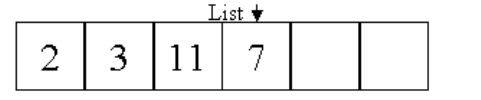

In [6]:
img.crop(bbox)

In [9]:
img.size

(481, 100)

In [10]:
padding = 3

In [11]:
desired_size = max(img.size) + padding * 2

In [13]:
delta_w = desired_size - img.size[0]
delta_h = desired_size - img.size[1]
padding = (padding, padding, delta_w-padding, delta_h-padding)
img = ImageOps.expand(img, padding, (255, 255, 255))

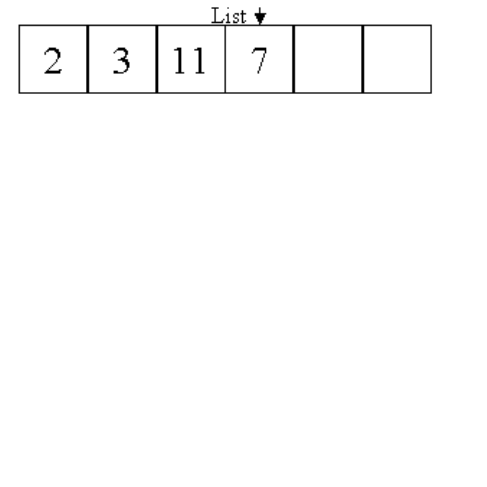

In [14]:
img

In [15]:
def extract_patches(img, splits):
        patches = []
        w, h = img.size  # width, height
        for n in splits:
            dw, dh = w // n, h // n
            for j in range(n):
                for i in range(n):
                    bbox = dw * i, dh * j, dw * (i + 1), dh * (j + 1)
                    patch = img.crop(bbox)
                    patches.append(patch)
        return patches

In [16]:
l = extract_patches(img, [1, 2, 3, 4, 7])

In [18]:
len(l)

79

In [26]:
"3.png"[:-4]

'3'

In [2]:
f = torch.load("../data/ccksdata/patch_embeddings/resnet101_pool5_79_icon/ccks_train_resnet101_pool5_79_icon.pth")

In [3]:
f

{639: tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0045, 0.0000],
         [0.0000, 0.0028, 0.0000,  ..., 0.0000, 0.0011, 0.0013],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0069],
         [0.0000, 0.0017, 0.0000,  ..., 0.0000, 0.0008, 0.0065]]),
 689: tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0481],
         [0.0000, 0.0017, 0.0000,  ..., 0.0000, 0.0000, 0.0011],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0003, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0071],
         [0.0003, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0071],
         [0.0003, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0071]]),
 34: tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0046],
         [0.0000, 0.0153, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0040, 0.0000,  ..., 0.00

In [4]:
a = {1:"3"}

In [7]:
a.__len__()

1

In [9]:
ord("A")

65

In [10]:
r = {1:"A", 2:"B"}

In [11]:
import pandas as pd

In [19]:
a = pd.DataFrame.from_dict(r, orient="index", columns=["label"])

In [20]:
a

,label
1,A
2,B


In [25]:
a = a.reset_index().rename(columns= {"index" : "id"}).set_index("id")

In [26]:
a

,label
id,
1,A
2,B


In [27]:
a.to_csv("./123.csv")

In [11]:
torch.arange(10).expand(1, 2, 10)

tensor([[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
         [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]])

In [12]:
a = torch.zeros(1, 1, 768)

In [15]:
a.expand((10, -1, -1)).size()

torch.Size([10, 1, 768])

In [2]:
a = torch.ones((10, 50, 768))
b = torch.zeros((10, 10, 768))

In [4]:
c = torch.cat((a, b), 1)

In [5]:
c.size()

torch.Size([10, 60, 768])

In [6]:
c

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [7]:
a = torch.ones((10, 50, 768))
b = torch.zeros((10, 50, 1))

In [12]:
(a * b).sum(1).size()

torch.Size([10, 768])

In [2]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("google/bert_uncased_L-4_H-512_A-8")

In [18]:
tokens_tensor = torch.tensor([tokenizer.convert_tokens_to_ids(["11"])]).cuda(1)

In [19]:
tokens_tensor

tensor([[2340]], device='cuda:1')

In [20]:
from transformers import BertModel
bertmodel = BertModel.from_pretrained("google/bert_uncased_L-4_H-512_A-8").cuda(1)

Some weights of the model checkpoint at google/bert_uncased_L-4_H-512_A-8 were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [33]:
bertmodel.embeddings(tokens_tensor)

tensor([[[ 5.8522e-01, -1.4848e-01, -4.9206e-02,  1.8366e-01,  6.5200e-01,
          -5.3770e-01,  5.1023e-01,  1.0508e+00,  1.0931e+00,  2.3273e-01,
           9.3981e-01, -5.5170e-01, -7.6502e-01, -9.0005e-01, -5.2128e-01,
           3.7214e-01,  2.2168e-01,  2.9648e-01,  3.2401e-01, -1.0260e+00,
           2.4330e-01, -6.5609e-01,  9.5866e-01,  1.1262e-01,  9.5881e-01,
          -5.5751e-01,  4.7631e-01, -6.4174e-01,  3.7254e-01, -3.5886e-01,
           1.6798e-01, -4.9144e-01, -1.7925e+00, -1.1731e+00,  1.0060e+00,
           1.6094e-01, -7.8870e-01, -7.8577e-01,  7.6346e-01, -1.1793e-01,
          -2.2855e-01, -1.1101e-01, -8.1685e-01, -1.9551e-01,  1.4325e+00,
           6.4245e-03, -4.7680e-01, -3.5092e-01, -3.0961e-02,  5.0599e+00,
           1.3828e+00, -7.6765e-01, -8.4520e-01, -5.3847e-01,  1.1756e-01,
           7.0990e-01, -2.8103e-01, -5.5227e-01, -1.0747e+00,  2.4811e-01,
          -1.4294e+00, -1.1023e+00, -9.4193e-01, -1.1897e-02, -4.7577e-01,
           6.0093e-01, -6

In [16]:
from sklearn.preprocessing import LabelEncoder
import json
import numpy as np

In [26]:
a = json.load(open(os.path.join("../data/ccksdata/", 'obj_set.json')))['shape_name']

In [27]:
le = LabelEncoder()

In [28]:
a

['ellipse', 'circle', 'rect']

In [29]:
le.fit(a)

LabelEncoder()

In [37]:
le.transform(["circle"])[0]

0

In [41]:
a = np.zeros((2))

In [42]:
a[0] = 1

In [43]:
a

array([1., 0.])

In [45]:
import torch

/home/chenyang/software/miniconda3/envs/ccks/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [46]:
torch.tensor([1, 2, 3, 4])

tensor([1, 2, 3, 4])

In [49]:
from transformers import BertTokenizer,BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-cased') # Bert的分词器
bertmodel = BertModel.from_pretrained('bert-base-cased').cuda(1) # load the TF model for Pytorch
text = " I love python ! "
# 对于一个句子，首尾分别加[CLS]和[SEP]。
text = "[CLS] " + text + " [SEP]"
# 然后进行分词
tokenized_text1 = tokenizer.tokenize(text) 
indexed_tokens1 = tokenizer.convert_tokens_to_ids(tokenized_text1)
# 分词结束后获取BERT模型需要的tensor
segments_ids1 = [1] * len(tokenized_text1)
tokens_tensor1 = torch.tensor([indexed_tokens1]).cuda(1) # 将list转为tensor
segments_tensors1 = torch.tensor([segments_ids1]).cuda(1)
# 获取所有词向量的embedding
word_vectors1 = bertmodel(tokens_tensor1, segments_tensors1)[0]
# 获取句子的embedding
sentenc_vector1 = bertmodel(tokens_tensor1, segments_tensors1)[1]

Downloading: 100%|██████████| 416M/416M [01:34<00:00, 4.60MB/s] 
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [55]:
sentenc_vector1.size()

torch.Size([1, 768])

In [54]:
tokenized_text1

['[CLS]', 'I', 'love', 'p', '##yt', '##hon', '!', '[SEP]']

In [58]:
a = torch.tensor([1.2, 0.4])

In [61]:
b = torch.tensor([1.2, 0.6])

In [67]:
torch.ones((1, 512)).squeeze(0).size()

torch.Size([512])

In [1]:
import torch

/home/chenyang/software/miniconda3/envs/ccks/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
torch.arange(10).expand((1, -1))

tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])